## Decision Tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Load the all details csv 
#par_details = pd.read_csv('..../Stat_csv_files/AWNS_AWS_all_details.csv') #Change path as required

In [ ]:
#split dataset in features and target variable
#feature_cols = ['Total_Duration_Clipped_s', 'Mean Speech_s','Mean Pause_s','Percent_Pause','Pause_Duration_s','Pause_Events','CV Speech', 'CV Pause', 'long_p_count','short_p_count','long_p_durations_cv','short_p_durations_mean','short_p_durations_cv','long_p_durations_mean','Speech_Rate']
feature_cols = ['Pause_Duration_s','Pause_Events','CV Speech', 'CV Pause','Mean Pause_s','Mean Speech_s','long_p_count','short_p_count','Speech_Rate','long_p_durations_cv','short_p_durations_cv','long_p_durations_mean','short_p_durations_mean']

X = par_details[feature_cols] # Features
y = par_details['Group'] # Target variable

In [ ]:
feature_cols1 = feature_cols + ['Group']
data = par_details.loc[:, feature_cols1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110) # 80% training and 20% test

In [ ]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35, 13)
(35,)
(28, 13)
(28,)
(7, 13)
(7,)


Accuracy: 0.7142857142857143
Confusion matrix:
[[2 1]
 [1 3]]


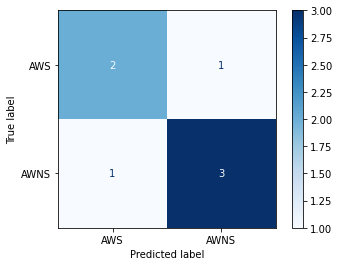

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(max_depth=20, min_samples_split=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)

#Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AWS', 'AWNS'])
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [ ]:
# Define the target variable and features
target = 'Group'
features = [col for col in data.columns if col != target]



# Define the decision tree classifier
dtc = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {'max_depth': [2, 3, 5, 7],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [2, 4]}

# Perform repetitive random sampling with grid search
n_samples = 10
scores = []
for i in range(n_samples):
    # Sample a subset of the data
    sample = data.sample(frac=0.8, replace=True, random_state=i)
    X = sample[features]
    y = sample[target]
    
    # Perform grid search on the decision tree classifier
    rs = RandomizedSearchCV(dtc, param_grid, cv=3, n_iter=10, random_state=i)
    rs.fit(X, y)
    
    # Print the metrics for the best model
    print(f"Sample {i+1} - Best score: {rs.best_score_:.3f}")
    print(f"Sample {i+1} - Best parameters: {rs.best_params_}")
    scores.append(rs.best_score_)


Sample 1 - Best score: 0.781
Sample 1 - Best parameters: {'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 3}
Sample 2 - Best score: 0.681
Sample 2 - Best parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 5}
Sample 3 - Best score: 0.785
Sample 3 - Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
Sample 4 - Best score: 0.715
Sample 4 - Best parameters: {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 7}
Sample 5 - Best score: 0.893
Sample 5 - Best parameters: {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 7}
Sample 6 - Best score: 0.744
Sample 6 - Best parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 5}
Sample 7 - Best score: 0.819
Sample 7 - Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
Sample 8 - Best score: 0.893
Sample 8 - Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7}
Sample 9 - Best score: 0.648
Sam

In [ ]:
# Train the selected model on the entire dataset
best_params_index = np.argmax(scores)
best_params = rs.cv_results_['params'][best_params_index]
dtc = DecisionTreeClassifier(**best_params)
dtc.fit(data[features], data[target])

# Evaluate the model using cross-validation
cv_scores = cross_val_score(dtc, data[features], data[target], cv=3)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores):.3f}")


Cross-validation scores: [0.58333333 0.66666667 0.63636364]
Mean cross-validation score: 0.629


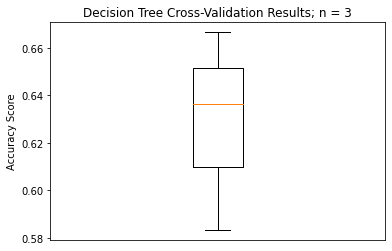

In [ ]:
# Plot the cross-validation scores
plt.boxplot(cv_scores)
num =3
plt.title("Decision Tree Cross-Validation Results; n = %i" %num)
plt.xticks([])
plt.ylabel("Accuracy Score")
plt.show()

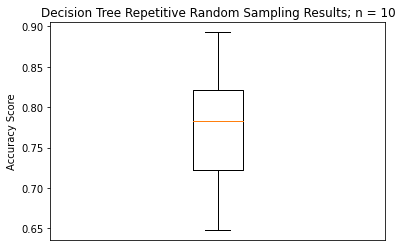

In [ ]:
# Plot the cross-validation scores
plt.boxplot(scores)
num =10
plt.title("Decision Tree Repetitive Random Sampling Results; n = %i" %num)

plt.xticks([])
plt.ylabel("Accuracy Score")
plt.show()